<a href="https://colab.research.google.com/github/gg5d/Diffusion_models/blob/main/Covariance_interpolation_for_Schrodinger_Bridges.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Covariance interpolation for Schrodinger Bridges

# Linear Interpolation
* Mean: $\mu(t) = (1 - t)\mu_0 + t\mu_1$
* Covariance: $\Sigma(t) = (1 - t)\Sigma_0 + t\Sigma_1$



# Geodesic Interpolation (Affine-Invariant Riemannian Metric)
* Mean: $\mu(t) = (1 - t)\mu_0 + t\mu_1$
* Covariance: $\Sigma(t) = \Sigma_0^{1/2} \left( \Sigma_0^{-1/2} \Sigma_1 \Sigma_0^{-1/2} \right)^t \Sigma_0^{1/2}$

# Wasserstein Interpolation (Optimal Transport)
* Mean: $\mu(t) = (1 - t)\mu_0 + t\mu_1$
* Covariance: $\Sigma(t) = \left[(1 - t)I + t A\right] \Sigma_0 \left[(1 - t)I + t A\right]^T$

 where $A = \Sigma_0^{-1/2} \left( \Sigma_0^{1/2} \Sigma_1 \Sigma_0^{1/2} \right)^{1/2} \Sigma_0^{-1/2}$


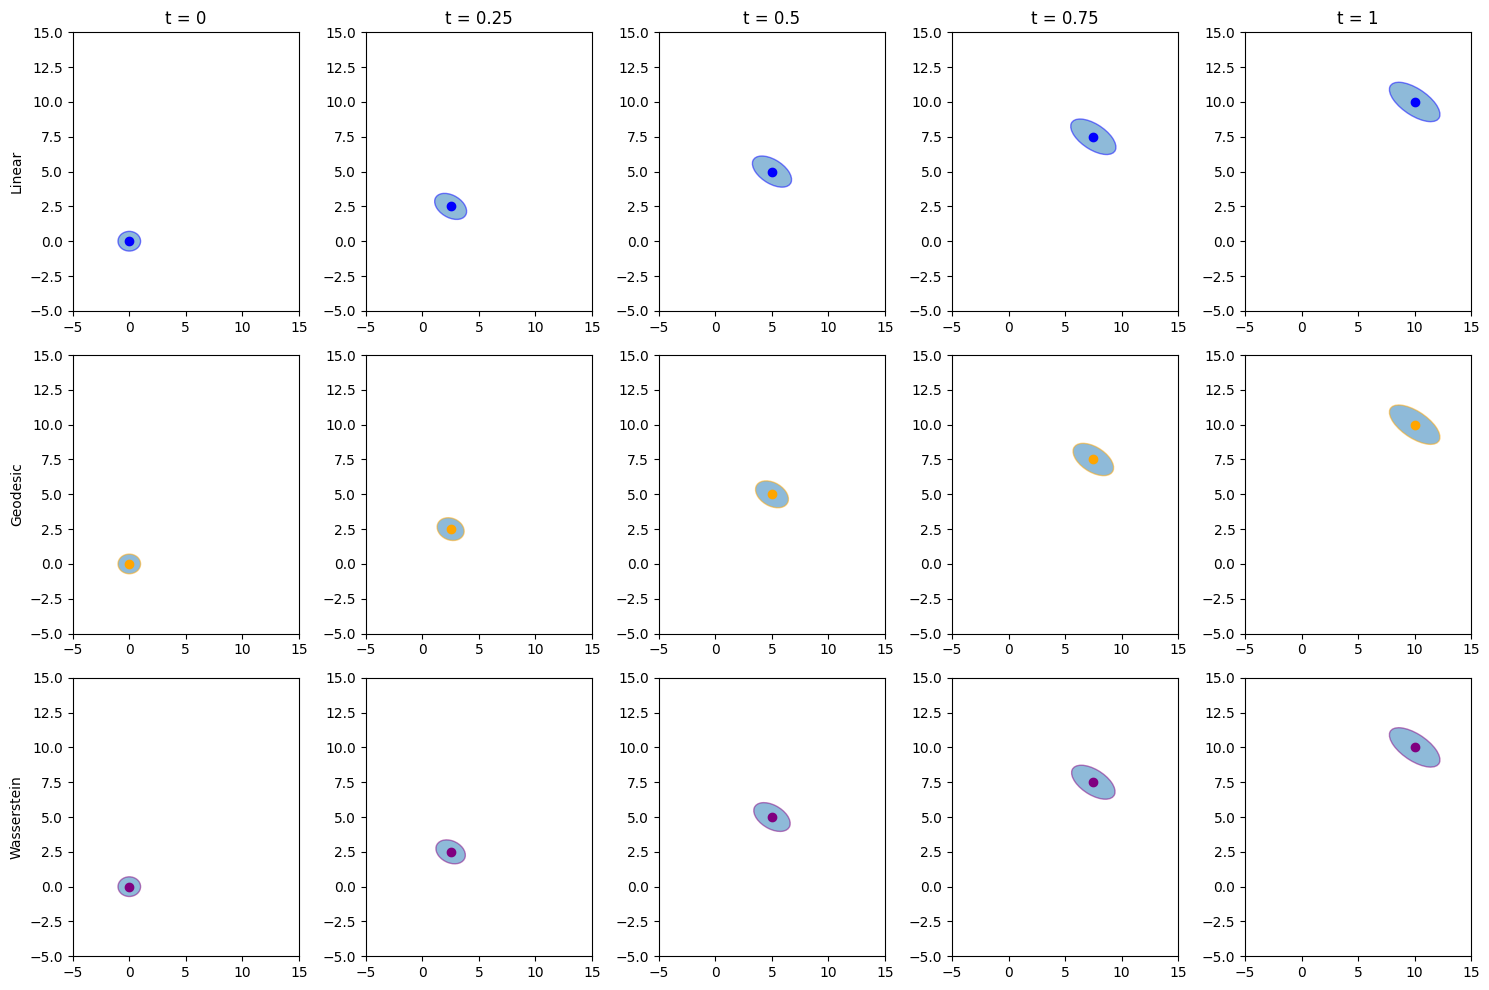

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import fractional_matrix_power
from matplotlib.patches import Ellipse

# Parameters for the two Gaussian distributions
mu0 = np.array([0, 0])
Sigma0 = np.array([[1, 0], [0, 0.5]])

mu1 = np.array([10, 10])
Sigma1 = np.array([[5, -2], [-2, 2]])

# Interpolation steps
t_values = [0, 0.25, 0.5, 0.75, 1]

# Interpolation functions
def interpolate_linear(mu0, Sigma0, mu1, Sigma1, t):
    mu_t = (1 - t) * mu0 + t * mu1
    Sigma_t = (1 - t) * Sigma0 + t * Sigma1
    return mu_t, Sigma_t

def interpolate_geodesic(mu0, Sigma0, mu1, Sigma1, t):
    mu_t = (1 - t) * mu0 + t * mu1
    Sigma0_sqrt = fractional_matrix_power(Sigma0, 0.5)
    Sigma0_inv_sqrt = fractional_matrix_power(Sigma0, -0.5)
    Sigma_t = Sigma0_sqrt @ fractional_matrix_power(Sigma0_inv_sqrt @ Sigma1 @ Sigma0_inv_sqrt, t) @ Sigma0_sqrt
    return mu_t, Sigma_t

def interpolate_wasserstein(mu0, Sigma0, mu1, Sigma1, t):
    mu_t = (1 - t) * mu0 + t * mu1
    Sigma0_sqrt = fractional_matrix_power(Sigma0, 0.5)
    Sigma0_inv_sqrt = fractional_matrix_power(Sigma0, -0.5)
    A = Sigma0_inv_sqrt @ fractional_matrix_power(Sigma0_sqrt @ Sigma1 @ Sigma0_sqrt, 0.5) @ Sigma0_inv_sqrt
    Sigma_t = ((1 - t) * np.eye(2) + t * A) @ Sigma0 @ ((1 - t) * np.eye(2) + t * A).T
    return mu_t, Sigma_t

# Function to plot covariance ellipse
def plot_covariance_ellipse(ax, mu, Sigma, **kwargs):
    vals, vecs = np.linalg.eigh(Sigma)
    order = vals.argsort()[::-1]
    vals, vecs = vals[order], vecs[:, order]
    theta = np.degrees(np.arctan2(*vecs[:, 0][::-1]))
    width, height = 2 * np.sqrt(vals)
    ellipse = Ellipse(xy=mu, width=width, height=height, angle=theta, **kwargs)
    ax.add_patch(ellipse)

# Create subplots for each interpolation method
fig, axs = plt.subplots(3, len(t_values), figsize=(15, 10))

for i, t in enumerate(t_values):
    # Linear interpolation
    mu_t, Sigma_t = interpolate_linear(mu0, Sigma0, mu1, Sigma1, t)
    ax = axs[0, i]
    plot_covariance_ellipse(ax, mu_t, Sigma_t, edgecolor='blue', alpha=0.5)
    ax.scatter(*mu_t, color='blue')
    ax.set_xlim(-5, 15)
    ax.set_ylim(-5, 15)
    ax.set_title(f't = {t}')
    if i == 0:
        ax.set_ylabel('Linear')

    # Geodesic interpolation
    mu_t, Sigma_t = interpolate_geodesic(mu0, Sigma0, mu1, Sigma1, t)
    ax = axs[1, i]
    plot_covariance_ellipse(ax, mu_t, Sigma_t, edgecolor='orange', alpha=0.5)
    ax.scatter(*mu_t, color='orange')
    ax.set_xlim(-5, 15)
    ax.set_ylim(-5, 15)
    if i == 0:
        ax.set_ylabel('Geodesic')

    # Wasserstein interpolation
    mu_t, Sigma_t = interpolate_wasserstein(mu0, Sigma0, mu1, Sigma1, t)
    ax = axs[2, i]
    plot_covariance_ellipse(ax, mu_t, Sigma_t, edgecolor='purple', alpha=0.5)
    ax.scatter(*mu_t, color='purple')
    ax.set_xlim(-5, 15)
    ax.set_ylim(-5, 15)
    if i == 0:
        ax.set_ylabel('Wasserstein')

plt.tight_layout()
plt.show()
